In [1]:
import sklearn
import pandas as pd 
import numpy as np
import nltk

dowload NLTK


In [2]:
nltk.download('all')

[nltk_data] Downloading collection u'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/nikos/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/nikos/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/nikos/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /home/nikos/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/nikos/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/nikos/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]  

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to /home/nikos/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to /home/nikos/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /home/nikos/nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     /home/nikos/nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     /home/nikos/nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     /home/nikos/nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!


True

Load our dataset using pandas

In [3]:
train_df = pd.read_csv("/home/nikos/Desktop/train2017.tsv",names=["Id1", "Id2", "Sentiment", "Tweet"],engine="python", sep="\t+",escapechar="\\")
train_df= train_df[['Sentiment','Tweet']]
train_df.head()

,Sentiment,Tweet
0,positive,Gas by my house hit $3.39!!!! I'm going to Cha...
1,negative,"Theo Walcott is still shit, watch Rafa and Joh..."
2,negative,"its not that I'm a GSP fan, i just hate Nick D..."
3,negative,Iranian general says Israel's Iron Dome can't ...
4,neutral,"Tehran, Mon Amour: Obama Tried to Establish Ti..."


Tokenization

In [4]:
from nltk import word_tokenize
import string
tokenized_tweets = []

for index, row in train_df.iterrows():
    s = row['Tweet'].translate(None, string.punctuation)
    tokenized_tweets.append(word_tokenize(s.decode('utf-8')))

Remove stopwords

In [5]:
from nltk.corpus import stopwords
filtered = []
bow = []
for tweet in tokenized_tweets:
    filtered_tweet = [w.lower() for w in tweet if not w in stopwords.words('english')]
    filtered.append(filtered_tweet)
    bow.extend(filtered_tweet)

Graph showing the k (10) most frequent words overall

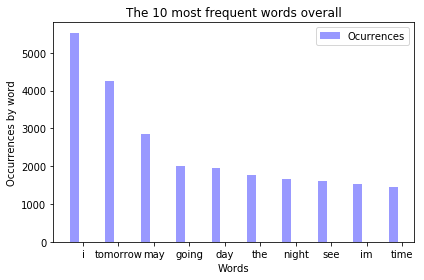

In [7]:
#most used words overall
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Counter = Counter(x for xs in filtered for x in set(xs))
data = Counter.most_common(10) 

n_groups = len(data)

d1 = [x[1] for x in data]
d0 = [x[0] for x in data]

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.4

rects1 = plt.bar(index, d1, bar_width, alpha=opacity, color='b', label='Ocurrences')

plt.xlabel('Words')
plt.ylabel('Occurrences by word')
plt.title('The 10 most frequent words overall')
plt.xticks(index + bar_width, d0)
plt.legend()

plt.tight_layout()
plt.show()

We present the most used words overall and for each type of tweet.
For each category there is a specific word cloud.

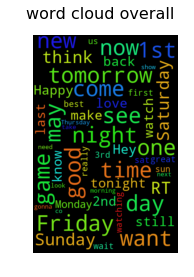

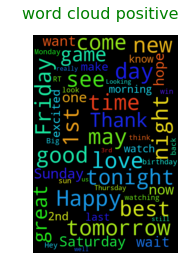

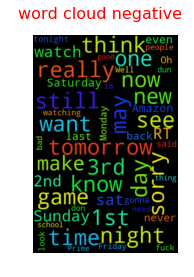

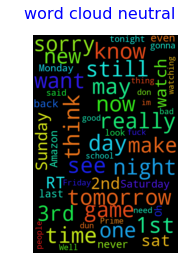

In [8]:
#wordcloud

from os import path
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

frames=[]
mystopwords = set(STOPWORDS)
#add more stopwords
mystopwords.update( ['will', 'say', 'u002c', 'today', 'many', 'month', 'go', 'going', 'got', 'u2019', 'u2019s', 'u2019t','u2019m', 'th'] )

dp=train_df.loc[train_df['Sentiment'] == 'positive'] 
dp['Tweet']
frames.append(dp)

dng=train_df.loc[train_df['Sentiment'] == 'negative'] 
dng['Tweet']
frames.append(dng)

dnt=train_df.loc[train_df['Sentiment'] == 'neutral'] 
dng['Tweet']
frames.append(dng)

#generate a word cloud image overall
wordcloud = WordCloud(max_font_size=60,width=400,height=600,max_words=50, stopwords=mystopwords).generate(train_df['Tweet'].to_string())
plt.imshow(wordcloud, interpolation='bilinear')		#display the generated image with matplotlib
plt.axis("off")
plt.suptitle("word cloud overall", size=16)
plt.show()

i=0     #variable to print the correct category
for index in frames:
    #generate a word cloud image for each sentiment
    wordcloud = WordCloud(max_font_size=60,width=400,height=600,max_words=50, stopwords=mystopwords).generate(index['Tweet'].to_string())

    plt.imshow(wordcloud, interpolation='bilinear')     #display the generated image with matplotlib
    plt.axis("off")
    if(i==0): plt.suptitle("word cloud positive", size=16, color='g')
    if(i==1): plt.suptitle("word cloud negative", size=16, color='r')
    if(i==2): plt.suptitle("word cloud neutral", size=16, color='b')
    plt.show()
    i+=1

This is a pie chart showing the percentage of each tweet type.

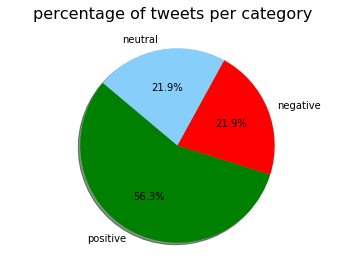

In [9]:
#pie chart 

sizes=[]
for index in frames:
    sizes.append(len(index))
    
labels = 'positive', 'negative', 'neutral'
colors = ['green', 'red', 'lightskyblue']
explode = (0, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.suptitle("percentage of tweets per category", size=16)
plt.show()    